![euroscipy2022-logo](../asset/euroscipy2022-logo.png)

# Optimization with Scipy

*Reading time ~45 min*

- Authored by: [Vincent Maladiere](https://github.com/Vincent-Maladiere)
- Credits: [Scipy turorial](https://scipy-lectures.org/advanced/mathematical_optimization/auto_examples/plot_noisy.html#sphx-glr-advanced-mathematical-optimization-auto-examples-plot-noisy-py)

## Problem definitions

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import optimize

### Convexity

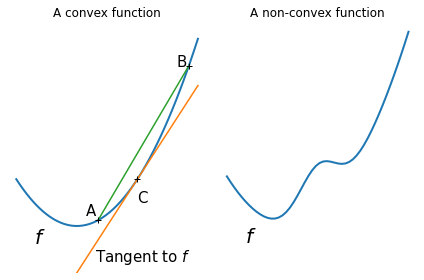

In [15]:
x = np.linspace(-1, 2)

fig, axes = plt.subplots(1, 2, figsize=(6, 4))

# A convex function
axes[0].plot(x, x**2, linewidth=2)
axes[0].text(-.7, -.6**2, '$f$', size=20)

# The tangent in one point
axes[0].plot(x, 2*x - 1)
axes[0].plot(1, 1, 'k+')
axes[0].text(.3, -.75, "Tangent to $f$", size=15)
axes[0].text(1, 1 - .5, 'C', size=15)

# Convexity as barycenter
axes[0].plot([.35, 1.85], [.35**2, 1.85**2])
axes[0].plot([.35, 1.85], [.35**2, 1.85**2], 'k+')
axes[0].text(.35 - .2, .35**2 + .1, 'A', size=15)
axes[0].text(1.85 - .2, 1.85**2, 'B', size=15)
axes[0].set_title("A convex function")
axes[0].set_ylim(ymin=-1)
axes[0].axis('off')

# A non convex function
axes[1].plot(x, x**2 + np.exp(-5*(x - .5)**2), linewidth=2)
axes[1].text(-.7, -.6**2, '$f$', size=20)
axes[1].set_title("A non-convex function")
axes[1].set_ylim(ymin=-1)
axes[1].axis('off')
plt.tight_layout()

A convex function:
- f is above all its tangents.
- equivalently, for two point A, B, f(C) lies below the segment [f(A), f(B])], if A < C < B

Finding the global minimum of a convex functions is easy. Finding it for non-convex function is harder.

For convex functions, we can show that if we find a local minimum is also the global minimum. In that sense, the minimum is unique.

### Smoothness

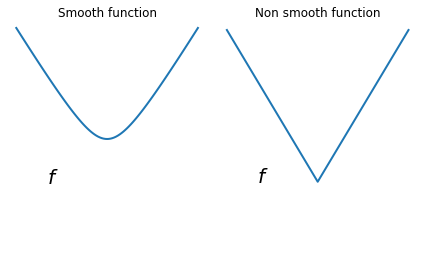

In [28]:
x = np.linspace(-1.5, 1.5, 101)

fig, axes = plt.subplots(1, 2, figsize=(6, 4))

# A smooth function
axes[0].plot(x, np.sqrt(.2 + x**2), linewidth=2)
axes[0].text(-1, 0, '$f$', size=20)
axes[0].set_ylim(ymin=-.9)
axes[0].axis('off')
axes[0].set_title("Smooth function")

# A non-smooth function
axes[1].plot(x, np.abs(x), linewidth=2)
axes[1].text(-1, 0, '$f$', size=20)
axes[1].set_ylim(ymin=-0.9)
axes[1].axis('off')
axes[1].set_title("Non smooth function")

plt.tight_layout()

The gradient of a smooth function is defined everywhere, and is a continuous function. 

Therefore optimizing smooth functions is easier (true in the context of black-box optimization, otherwise Linear Programming is an example of methods which deal very efficiently with piece-wise linear functions).

### Noisy optimization problem

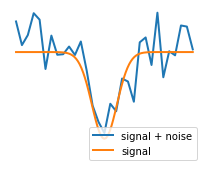

In [43]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(0)

x = np.linspace(-5, 5, 101)
x_ = np.linspace(-5, 5, 31)

def f(x):
    return -np.exp(-x**2)

# A smooth function
plt.figure(1, figsize=(3, 2.5))

plt.plot(x_, f(x_) + .2*np.random.normal(size=31), linewidth=2, label="signal + noise")
plt.plot(x, f(x), linewidth=2, label="signal")

plt.ylim(ymin=-1.3)
plt.axis('off')
plt.tight_layout()
plt.legend(loc="lower right");

Many optimization methods rely on gradients of the objective function. If the gradient function is not given, they are computed numerically, which induces errors. In such situation, even if the objective function is not noisy, a gradient-based optimization may be a noisy optimization.

### Constraints

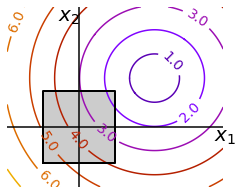

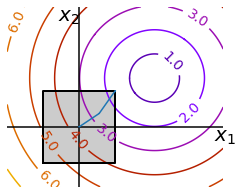

In [92]:
x, y = np.mgrid[-2.9:5.8:.05, -2.5:5:.05]
x = x.T
y = y.T

for i in (1, 2):
    # Create 2 figure: only the second one will have the optimization
    # path
    plt.figure(i, figsize=(3, 2.5))
    plt.clf()
    plt.axes([0, 0, 1, 1])

    contours = plt.contour(np.sqrt((x - 3)**2 + (y - 2)**2),
                        extent=[-3, 6, -2.5, 5],
                        cmap=plt.cm.gnuplot)
    plt.clabel(contours,
            inline=1,
            fmt='%1.1f',
            fontsize=14)
    plt.plot([-1.5, -1.5,  1.5,  1.5, -1.5],
            [-1.5,  1.5,  1.5, -1.5, -1.5], 'k', linewidth=2)
    plt.fill_between([ -1.5,  1.5],
                    [ -1.5, -1.5],
                    [  1.5,  1.5],
                    color='.8')
    plt.axvline(0, color='k')
    plt.axhline(0, color='k')

    plt.text(-.9, 4.4, '$x_2$', size=20)
    plt.text(5.6, -.6, '$x_1$', size=20)
    plt.axis('equal')
    plt.axis('off')

# And now plot the optimization path
accumulator = list()

def f(x):
    # Store the list of function calls
    accumulator.append(x)
    return np.sqrt((x[0] - 3)**2 + (x[1] - 2)**2)


# We don't use the gradient, as with the gradient, L-BFGS is too fast,
# and finds the optimum without showing us a pretty path
def f_prime(x):
    r = np.sqrt((x[0] - 3)**2 + (x[0] - 2)**2)
    return np.array(((x[0] - 3)/r, (x[0] - 2)/r))

optimize.minimize(f, np.array([0, 0]), method="L-BFGS-B",
                     bounds=((-1.5, 1.5), (-1.5, 1.5)))

accumulated = np.array(accumulator)
plt.plot(accumulated[:, 0], accumulated[:, 1])

plt.show()

$-1 < x1 < 1 \\ -1 < x2 < 1$

## Getting started: 1D optimization

### Brent's method

Let’s get started by finding the minimum of the scalar function $f(x)=\exp[(x-0.7)^2]$. 

`scipy.optimize.minimize_scalar()`
 uses [Brent’s method](https://en.wikipedia.org/wiki/Brent%27s_method) to find the minimum of a function. 
 
 Brent's method leverages both the secant method and bisection to find the root of a function $f$. It add few tweaks to the Dekker's methods below:
 - $b_k$ is the current iterate (aka "best guess" for the root of $f$)
 - $a_k$ is the "contrapoint", such that $f(b_k)$ and $f(a_k)$ have opposite signs, so the interval $[a_k, b_k]$ contains the solution.
 We compute 2 values:
 1. secant method: $s = b_k - \frac{b_k - b_{k-1}}{f(b_k) - f(b_{k-1})}f(b_k)$
 2. bisection: $m = \frac{a_k+b_k}{2}$
 
$b_{k+1} = \begin{cases} s & \mathrm{if}\; s\; \in [b_k, m] \\ m & \mathrm{otherwise}\end{cases}$

$a_{k+1} = \begin{cases} a_k & \mathrm{if}\; f(a_k)\;\mathrm{and}\;f(b_k)\;\mathrm{have\;opposite\;signs} \\ b_k & \mathrm{otherwise} \end{cases}$


In [118]:
def f(x):
    return -np.exp(-(x-0.7)**2)

result = optimize.minimize_scalar(f)
result.success, result.x

(True, 0.6999999997839409)

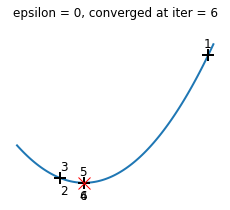

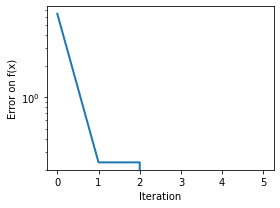

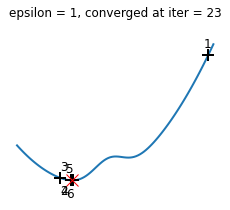

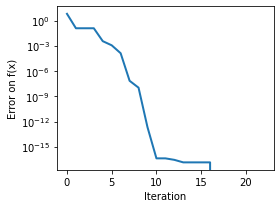

In [140]:
x = np.linspace(-1, 3, 100)
x_0 = np.exp(-1)

def f(x):
    return (x - x_0)**2 + epsilon*np.exp(-5*(x - .5 - x_0)**2)

for epsilon in (0, 1):
    plt.figure(figsize=(3, 2.5))
    plt.axes([0, 0, 1, 1])

    # A convex function
    plt.plot(x, f(x), linewidth=2)

    # Apply brent method. To have access to the iteration, do this in an
    # artificial way: allow the algorithm to iter only once
    all_x = list()
    all_y = list()
    for iter in range(30):
        result = optimize.minimize_scalar(f, bracket=(-5, 2.9, 4.5), method="Brent", bounds=[-1, 1],
                    options={"maxiter": iter}, tol=np.finfo(1.).eps)
        if result.success:
            break

        this_x = result.x
        all_x.append(this_x)
        all_y.append(f(this_x))
        if iter < 6:
            plt.text(this_x - .05*np.sign(this_x) - .05,
                    f(this_x) + 1.2*(.3 - iter % 2), iter + 1,
                    size=12)
    
    plt.title(f"epsilon = {epsilon}, converged at iter = {iter}")
    plt.plot(all_x[:10], all_y[:10], 'k+', markersize=12, markeredgewidth=2)

    plt.plot(all_x[-1], all_y[-1], 'rx', markersize=12)
    plt.axis('off')
    plt.ylim(ymin=-1, ymax=8)

    plt.figure(figsize=(4, 3))
    plt.semilogy(np.abs(all_y - all_y[-1]), linewidth=2)
    plt.ylabel('Error on f(x)')
    plt.xlabel('Iteration')
    plt.tight_layout()

plt.show()

**Brent’s method on a quadratic function**: it converges in 3 iterations, as the quadratic approximation is then exact.<br>
**Brent’s method on a non-convex function**: note that the fact that the optimizer avoided the local minimum is a matter of luck.

Try to use different solver by changing the `method` value. Options: `{"Brent", "Bounded", "Golden"}`.

## N-dimensions

Let's use the Rosenbrock function as an N-D exemple:

$$f(\textbf{x})=\sum^{N-1}_{i=1}100 (x_{i+1} - x_i^2)^2+(1-x_i)^2$$

The minimum of this function is 0, which is achieved when all $x_i = 1$.

In [143]:
def rosen(x):
    """The Rosenbrock function"""
    return sum(100.0*(x[1:]-x[:-1]**2.0)**2.0 + (1-x[:-1])**2.0)

### Nelder-Mead Simplex algorithm (`method='Nelder-Mead'`)

The simplex algorithm is a generalization of dichotomy approaches to high-dimensional spaces. It is probably the simplest way to minimize a fairly well-behaved function. It requires only function evaluations and is a good choice for simple minimization problems. 

<img src="../asset/nelder-mead-schema.png" width="400">

[image credits](https://www.youtube.com/watch?v=-GWze-wtu60&ab_channel=BYUFLOWLab)

A simplex in 2D in just a triangle. The point $x^{(0)}$ is considered the best point, $x^{(1)}$ the second best and $x^{(2)}$ the worst. We compute the centroid of our simplex $x_c$, excluding the worse point, and we reflect that worst point with respect to the centroid.


**Strength**: it is robust to noise, as it does not rely on computing gradients. Thus it can work on functions that are not locally smooth such as experimental data points, as long as they display a large-scale bell-shape behavior. However it is slower than gradient-based methods on smooth, non-noisy functions.

However, because it does not use any gradient evaluations, it may take longer to find the minimum.


<img src="../asset/nelder-mead.png" width="800"/>

In [144]:
x0 = np.array([1.3, 0.7, 0.8, 1.9, 1.2])
res = optimize.minimize(
    rosen,
    x0,
    method='nelder-mead',
    options={'xatol': 1e-8, 'disp': True},
)

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 339
         Function evaluations: 571


In [145]:
res.x

array([1., 1., 1., 1., 1.])

Ususally, we expect the number of function evaluations to be greater than the number iterations, because a single iteration call at least one function.

### Powell algorithm `(method='Powell')`

Another optimization algorithm that doesn't need gradients. It works by minimizing the function along 2 axis individually, and update these axis as such:

<img src="../asset/powell-schema.png" width="800">

[image credits](https://www.youtube.com/watch?v=1Z_4sBNoZj4&ab_channel=EMPossible)


Use it with `method='powell'` in minimize.

<img src="../asset/powells.png" width="800">

In [148]:
x0 = np.array([1.3, 0.7, 0.8, 1.9, 1.2])
res = optimize.minimize(
    rosen,
    x0,
    method='powell',
    options={'xtol': 1e-8, 'disp': True},  # note that the tolerance parameter `xatol` is now called `xtol`
)

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 19
         Function evaluations: 1622


In [149]:
res.x

array([1., 1., 1., 1., 1.])

**Question**: in this exemple, is Nelder-Mead's method faster than Powell's method?

In [171]:
%%timeit

_ = optimize.minimize(
    rosen,
    x0,
    method='nelder-mead',
    options={'xtol': 1e-8, 'disp': False}
)

13.2 ms ± 941 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [170]:
%%timeit

_ = optimize.minimize(
    rosen,
    x0,
    method='powell',
    options={'xtol': 1e-8, 'disp': False}
)

32.3 ms ± 1.47 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


We can also tweak our function to optimize and add some parameters, as in the following:

$$f(\textbf{x}, a, b)=\sum^{N-1}_{i=1}a(x_{i+1} - x_i^2)^2+(1-x_i)^2+b$$

In [156]:
def rosen_params(x, a, b):
    #TODO
    return sum(a * (x[1:] - x[:-1]**2) ** 2 + (1 - x[:-1]) ** 2 + b)

res = optimize.minimize(
    rosen_params,
    x0,
    method='nelder-mead',
    options={'xatol': 1e-8, 'disp': True},
    args=(0.5, 1),
)

Optimization terminated successfully.
         Current function value: 4.000000
         Iterations: 313
         Function evaluations: 525


In [157]:
res.x

array([1.        , 1.        , 1.00000001, 0.99999999, 0.99999997])

### Gradient Based methods

***Here we focus on intuitions, not code. Code will follow.***


Gradient descent basically consists in taking small steps in the direction of the gradient, that is the direction of the steepest descent.

$x_{k+1} = x_k - \alpha \nabla f(x_k) $

<img src="../asset/gradient-based.png" width="800">

We can see that very anisotropic (ill-conditioned) functions are harder to optimize. If you know natural scaling for your variables, prescale them so that they behave similarly. This is related to preconditioning.

### Adaptive set gradient descent

It can be advantageous to take bigger steps. This is done by gradient descent using line search.

Line search is finding the right step size for an iteration, with the condition:

$f(x_k) - f(x_k + \alpha_k d_k) \geq \alpha_k \gamma$, with $\gamma > 0$ and $d_k$ the chosen direction.

<img src="../asset/adap.png" width="800">

### Conjugate gradient descent

The gradient descent algorithms above are toys not to be used on real problems.

One of the problems of the simple gradient descent algorithms, is that it tends to oscillate across a valley, each time following the direction of the gradient, that makes it cross the valley. 

The conjugate gradient solves this problem by adding a friction term: each step depends on the two last values of the gradient and sharp turns are reduced.

<img src="../asset/cg-g.png" width="800">

Let's now code a bit.

The gradient of the Rosenbrock function is the following:

$$f(\textbf{x})=\sum^{N-1}_{i=1}(x_{i+1} - x_i^2)^2+(1-x_i)^2$$
$$\frac{\partial f}{\partial x_j} = \sum_{i=1}^N 200 (x_{i} - x_{i-1}^2) (\delta_{i, j} - 2 x_{i-1} \delta_{i-1, j}) - 2 (1 - x_{i-1}) \delta_{i-1, j} \\ = 200 (x_j - x_{j-1}^2) - 400 x_j (x_{j+1} - x_j ^ 2) - 2(1 - x_{j})$$

This expression is valid for the edges as well:

$$\frac{\partial f}{\partial x_0} = - 400 x_0 (x_1 - x_0 ^ 2) - 2 (1 - x_0)$$
$$\frac{\partial f}{\partial x_{N-1}} = 200 (x_{N-1} - x^2_{N-2})$$

In [220]:
def rosen_der(x):
    xm = x[1:-1]
    xm_m1 = x[:-2]
    xm_p1 = x[2:]
    der = np.zeros_like(x)
    der[1:-1] = 200*(xm-xm_m1**2) - 400*(xm_p1 - xm**2)*xm - 2*(1-xm)
    der[0] = -400*x[0]*(x[1]-x[0]**2) - 2*(1-x[0])
    der[-1] = 200*(x[-1]-x[-2]**2)
    return der

This gradient information is specified in the minimize function through the `jac` parameter as illustrated below.

In [223]:
res = optimize.minimize(
    rosen,
    x0,
    jac=rosen_der,
    method='CG',
    options={'disp': True},
)

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 47
         Function evaluations: 97
         Gradient evaluations: 97


In order to converge more quickly to the solution, this routine uses the gradient of the objective function. If the gradient is not given by the user, then it is estimated using first-differences, but will perform better if you can pass them the gradient:

In [217]:
%%timeit

_ = optimize.minimize(
    rosen,
    x0,
    method='CG',
    options={'disp': False},
    jac=rosen_der,
)

6.24 ms ± 329 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [219]:
%%timeit

_ = optimize.minimize(
    rosen,
    x0,
    method='CG',
    options={'disp': False},
)

24.5 ms ± 610 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


### Newton-Conjugate-Gradient algorithm `(method='Newton-CG')`

Newton-Conjugate Gradient algorithm is a modified Newton’s method and uses a conjugate gradient algorithm to (approximately) invert the local Hessian. Newton’s method is based on fitting the function locally to a quadratic form:

$$f(\textbf{x})=f(\textbf{x}_0) +  \nabla f(\textbf{x}_0) (\textbf{x} - \textbf{x}_0) + \frac{1}{2} (\textbf{x} - \textbf{x}_0)^{\top} \textbf{H}(\textbf{x}_0) (\textbf{x} - \textbf{x}_0) $$

where $\textbf{H}$ is a matrix of second-derivatives (the Hessian). If the Hessian is positive definite then the local minimum of this function can be found by setting the gradient of the quadratic form to zero, resulting in:

$$\textbf{x}_{opt} = \textbf{x}_0 - \textbf{H}^{-1}\nabla f$$

Due to the Hessian inversion, the complexity is $O(N^3)$

<img src="../asset/newton-cg.png" width="800">

In [198]:
def rosen_hess(x):
    x = np.asarray(x)
    H = np.diag(-400*x[:-1],1) - np.diag(400*x[:-1],-1)
    diagonal = np.zeros_like(x)
    diagonal[0] = 1200*x[0]**2-400*x[1]+2
    diagonal[-1] = 200
    diagonal[1:-1] = 202 + 1200*x[1:-1]**2 - 400*x[2:]
    H = H + np.diag(diagonal)
    return H

In [203]:
res = optimize.minimize(rosen_obj_and_der, x0, method='Newton-CG', jac=True, hess=rosen_hess,
               options={'disp': False})

In [204]:
res.x

array([0.9999852 , 0.9999705 , 0.99994098, 0.99988173, 0.99976293])

The Hessian can also be computed numerically, but the method will also be faster if you provide the hessian function.

In [226]:
%%timeit

_ = optimize.minimize(
    rosen,
    x0,
    method='Newton-CG',
    jac=rosen_der,
    hess=rosen_hess,
    options={'disp': False}
)

4.07 ms ± 384 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [227]:
%%timeit

_ = optimize.minimize(
    rosen,
    x0,
    method='Newton-CG',
    jac=rosen_der,
    options={'disp': False}
)

5.74 ms ± 346 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


### Quasi-Newton: BFGS algorithm `(method='BFGS')`

Refine an approximation of the Hessian at each steps, introducing a complexity in $O(n^2)$.

The BFGS method typically requires fewer function calls than the simplex algorithm even when the gradient must be estimated.

In very high dimensions (> 250) the Hessian matrix is too costly to compute and invert.  Limited-memory BFGS (L-BFGS) sits between BFGS and conjugate gradient keeps a low-rank version. In addition, box bounds are also supported by L-BFGS-B:

<img src="../asset/bfgs.png" width="800">

In [228]:
res = optimize.minimize(
    rosen,
    x0,
    method='BFGS',
    jac=rosen_der,
    options={'disp': True}
)

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 25
         Function evaluations: 30
         Gradient evaluations: 30


In [230]:
res.x

array([1.00000004, 1.0000001 , 1.00000021, 1.00000044, 1.00000092])

On possible speed-up is to unite the objective function and its gradient in a single function. This helps avoiding redundant computation.

This is implemented by setting `jac=True` instead of the `der` function and passing a tuple of `(objective, der)` functions as first input.

In [231]:
def rosen_obj_and_der(x):
    objective = sum(100.0*(x[1:]-x[:-1]**2.0)**2.0 + (1-x[:-1])**2.0)
    xm = x[1:-1]
    xm_m1 = x[:-2]
    xm_p1 = x[2:]
    der = np.zeros_like(x)
    der[1:-1] = 200*(xm-xm_m1**2) - 400*(xm_p1 - xm**2)*xm - 2*(1-xm)
    der[0] = -400*x[0]*(x[1]-x[0]**2) - 2*(1-x[0])
    der[-1] = 200*(x[-1]-x[-2]**2)
    return objective, der

In [234]:
%%timeit

res = optimize.minimize(
    rosen,
    x0,
    method='BFGS',
    jac=rosen_der,
    options={'disp': False}
)

3 ms ± 262 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [235]:
%%timeit

_ = optimize.minimize(
    rosen_obj_and_der,
    x0,
    method='BFGS',
    jac=True,
    options={'disp': False}
)

2.79 ms ± 60.3 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


## In a nutshell

- **Without knowledge of the gradient:**
    - Prefer BFGS or L-BFGS, even if you have to approximate numerically gradients. They are the default method of `minimize`.
    - On well-condionned problem, Powell and Nelder-Mead, both gradient-free methods, work well in high-dimension, but collapse on ill-conditioned problem.
- **With knowledge of the gradient:**
    - BFGS and L-BFGS
    - Conjugate gradient is more effective for computing computationally cheap functions.
- **With the Hessian:**
    - Prefer the Newton-CG method
- **If you have noisy measurements:**
    - Powell and Nelder-Mead

### Exercice 1: A simple (?) quadratic function

Optimize the following function, using K[0] as a starting point:

In [236]:
np.random.seed(0)
K = np.random.normal(size=(100, 100))

def f(x):
    return np.sum((np.dot(K, x - 1))**2) + np.sum(x**2)**2

def f_der(x):
    return 2*np.dot(np.dot(K.T, K), x - 1) + 4*np.sum(x**2)*x

def f_hessian(x):
    H = 2*np.dot(K.T, K) + 4*2*x*x[:, np.newaxis]
    return H + 4*np.eye(H.shape[0])*np.sum(x**2)

Hint: use the `evaluate` function

In [259]:
def evaluate(method_name, x_ref, x_some_method, compute_time):
    print(
        f"{method_name} -- x_squared error: {sum((x_ref - x_some_method)** 2):.6f}, "
        f"y diff: {f(x_some_method) - f(x_ref):.6f}, "
        f"time: {compute_time:.4f}s"
    ) 

In [266]:
from time import time

start = time()
x_ref = optimize.minimize(f, K[0], method="Powell").x
end = time()

evaluate("Powell", x_ref, x_ref, end - start)

### TODO - Write your code here ###


Powell -- x_squared error: 0.000000, y diff: 0.000000, time: 0.2921s


Time your approach. Find the fastest approach. Why is BFGS not working well?

[Solution](https://scipy-lectures.org/advanced/mathematical_optimization/auto_examples/plot_exercise_ill_conditioned.html)

### Exercice 2: Finding a minimum in a flat neighborhood

Consider the function: $\exp(\frac{-1}{0.1x^2 + y^2})$. It admits a minimum in (0, 0). Starting from a init at (1, 1), try to get within 1e-8 of this minimum point.

In [284]:
def f(x):
    return np.exp(-1/(.1 * x[0]**2 + x[1]**2))

### TODO - Write your code here ###


[Solution](https://scipy-lectures.org/advanced/mathematical_optimization/auto_examples/plot_exercise_flat_minimum.html)